# 최 하단부 plt에 한국어 표시하기 위한 부분

In [1]:
# 단계 1: 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (51.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 폰트 적용
plt.rc('font', family='NanumBarunGothic') 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df_mecab_adj의 클러스터링

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# DBSCAN 시작

In [ ]:
# 데이터 불러오기

df_mecab_adj = pd.read_csv('/content/drive/MyDrive/Data/Preprocessing/mecab_adj_total.csv', encoding='utf-8')

df_mecab_adj.head()

,keyword,mecab_adj2
0,168계단,있다 없다 있다 없다 비싸다 멀다...
1,25의용단,좋다 없다 없다 없다 없다 같다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...


In [ ]:
# mecab_adj2 컬럼을 mecab_adj로 변경하고 덮어쓰기

df_mecab_adj = df_mecab_adj.rename(columns={'mecab_adj2':'mecab_adj'})
df_mecab_adj.head()



,keyword,mecab_adj
0,168계단,있다 없다 있다 없다 비싸다 멀다...
1,25의용단,좋다 없다 없다 없다 없다 같다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...


In [ ]:
df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

df_mecab_adj.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,keyword,mecab_adj
0,168계단,있다 없다 있다 없다 비싸다 멀다...
1,25의용단,좋다 없다 없다 없다 없다 같다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...


In [ ]:
# mecab_adj에서 1글자인 단어를 삭제

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

df_mecab_adj.head()

,keyword,mecab_adj
0,168계단,있다 없다 있다 없다 비싸다 멀다 있다 많다 있다 있다 있다 있다 많다 많다 무섭다...
1,25의용단,좋다 없다 없다 없다 없다 같다 있다 있다 어렵다 있다 좋다 같다 있다 좋다 크다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다 좋다 크다 크다 있다 없다 없다 있다 이쁘다 좋다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다 깊다 있다 있다 좋다 멋지다 있다 없다 있다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋다 맛있다 아쉬우다 무겁다 없다 맛있다 재밌다 맛있...


중복단어 처리 차이

In [ ]:
# mecab_adj 컬럼에서 집합을 이용해 중복되는 단어를 삭제

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: set(x.split()))

df_mecab_adj.head()

,keyword,mecab_adj
0,168계단,"{이쁘다, 흔하다, 나쁘다, 겉다, 맛없다, 상관없다, 얇다, 습하다, 바쁘다, 세..."
1,25의용단,"{빠르다, 편하다, 똑같다, 맛있다, 재미있다, 이쁘다, 헛되다, 예쁘다, 없다, ..."
2,40계단 문화관,"{이쁘다, 흔하다, 아쉬우다, 나쁘다, 맛없다, 상관없다, 활기차다, 유례없다, 눈..."
3,40계단 문화관광테마거리,"{이쁘다, 흔하다, 뒤늦다, 나쁘다, 맛없다, 달갑다, 뜻깊다, 활기차다, 우습다,..."
4,60년전통 할매국밥,"{옳다, 흔하다, 아쉬우다, 나쁘다, 맛없다, 가벼우다, 얇다, 질기다, 습하다, ..."


In [ ]:
# { 를 [ 로 }를 ]로 바꾸기

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: str(x).replace('{', '[').replace('}', ']'))

df_mecab_adj.head()



,keyword,mecab_adj
0,168계단,"['이쁘다', '흔하다', '나쁘다', '겉다', '맛없다', '상관없다', '얇다..."
1,25의용단,"['빠르다', '편하다', '똑같다', '맛있다', '재미있다', '이쁘다', '헛..."
2,40계단 문화관,"['이쁘다', '흔하다', '아쉬우다', '나쁘다', '맛없다', '상관없다', '..."
3,40계단 문화관광테마거리,"['이쁘다', '흔하다', '뒤늦다', '나쁘다', '맛없다', '달갑다', '뜻깊..."
4,60년전통 할매국밥,"['옳다', '흔하다', '아쉬우다', '나쁘다', '맛없다', '가벼우다', '얇..."


In [ ]:
print(df_mecab_adj.size)
print(df_mecab_adj.shape)

1132
(566, 2)


# 벡터화 준비

In [ ]:
# konlpy 설치

!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 47.1 MB/s 


In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
# df_mecab_adj의 mecab_adj를 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_mecab_adj['mecab_adj'])

tfidf_matrix.shape


(566, 1087)

# 정규화

In [ ]:
# Normalize

from sklearn.preprocessing import normalize

tfidf_matrix = normalize(tfidf_matrix)

In [ ]:
# consine similarity

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# cosine_sim을 데이터프레임으로 변환

cosine_sim = pd.DataFrame(cosine_sim)

cosine_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,556,557,558,559,560,561,562,563,564,565
0,1.000000,0.191157,0.441416,0.444737,0.320805,0.300665,0.385703,0.371959,0.401497,0.303166,...,0.351885,0.249731,0.301764,0.353012,0.328835,0.376393,0.267976,0.320076,0.404972,0.298208
1,0.191157,1.000000,0.276033,0.237436,0.191761,0.204218,0.246422,0.247438,0.276197,0.173187,...,0.222020,0.280284,0.221302,0.282833,0.254130,0.246550,0.255571,0.174240,0.210018,0.293165
2,0.441416,0.276033,1.000000,0.604011,0.347850,0.360012,0.360782,0.407885,0.423402,0.311770,...,0.461737,0.298992,0.317665,0.379951,0.375695,0.390481,0.338556,0.380650,0.402400,0.373604
3,0.444737,0.237436,0.604011,1.000000,0.277736,0.302315,0.343653,0.382758,0.374623,0.296475,...,0.346843,0.247396,0.318864,0.308070,0.316513,0.310039,0.274749,0.303758,0.352935,0.304860
4,0.320805,0.191761,0.347850,0.277736,1.000000,0.252032,0.302272,0.388322,0.380123,0.221826,...,0.242279,0.236231,0.275454,0.238090,0.291246,0.358096,0.301783,0.343530,0.298812,0.307770


# DBSCAN

In [ ]:
# DBSCAN 으로 클러스터링

from sklearn.cluster import DBSCAN


In [ ]:
# cosine_sim을 이용해 클러스터링

dbscan = DBSCAN(eps=0.02, min_samples=2, metric ='euclidean')

dbscan.fit(cosine_sim)

# 클러스터링 결과 확인

dbscan.labels_



array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

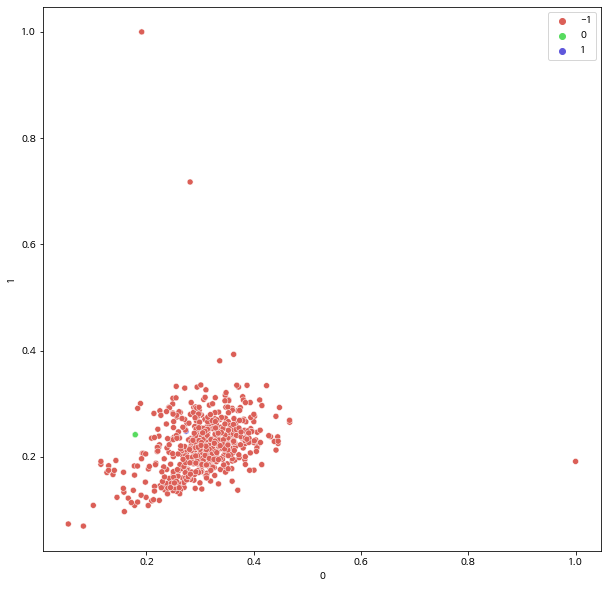

In [ ]:
# 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.scatterplot(x=cosine_sim[0], y=cosine_sim[1], hue=dbscan.labels_, palette=sns.color_palette('hls', len(set(dbscan.labels_))))

plt.show()

# dead code

In [ ]:

# epslion과 min_samples를 조절하여 클러스터링
model = DBSCAN(eps=0.5, min_samples=5, metric='cosine', n_jobs=-1)

df_scale['cluster']=model.fit(tfidf_matrix)

In [ ]:
# 클러스터링 결과 확인

df_scale.labels_

In [ ]:
# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'Annual Income (k$)'], df_scale.loc[df_scale['cluster'] == i, 'Spending Score (1-100)'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.5, min_samples = 2', size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()